 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = "/users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/whale_returns.csv"
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = "/users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/algo_returns.csv"
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)


In [6]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = "/Users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/sp_tsx_history.csv"
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history_df["Date"]=pd.to_datetime(sp_tsx_history_df["Date"],infer_datetime_format=True)
sp_tsx_history_df['Close'] = pd.to_numeric(sp_tsx_history_df['Close'].str.strip("$").str.replace(',', ''), errors='coerce')
sp_tsx_history_df

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [11]:
# Calculate Daily Returns
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].pct_change()
sp_tsx_history_df

,Date,Close
0,2012-10-01,NaN
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
...,...,...
1813,2019-12-20,0.003188
1814,2019-12-23,0.000600
1815,2019-12-24,0.003003
1816,2019-12-27,-0.000695


In [12]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna()
sp_tsx_history_df

,Date,Close
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709
...,...,...
1813,2019-12-20,0.003188
1814,2019-12-23,0.000600
1815,2019-12-24,0.003003
1816,2019-12-27,-0.000695


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.columns
sp_tsx_history_df = sp_tsx_history_df.rename(columns={'Close':'S&P TSX 60'})
sp_tsx_history_df

,Date,S&P TSX 60
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709
...,...,...
1813,2019-12-20,0.003188
1814,2019-12-23,0.000600
1815,2019-12-24,0.003003
1816,2019-12-27,-0.000695


In [14]:
## setting index
sp_tsx_history_df = sp_tsx_history_df.set_index("Date")

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_history_df],axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns for all Portfolio'}, xlabel='Date'>

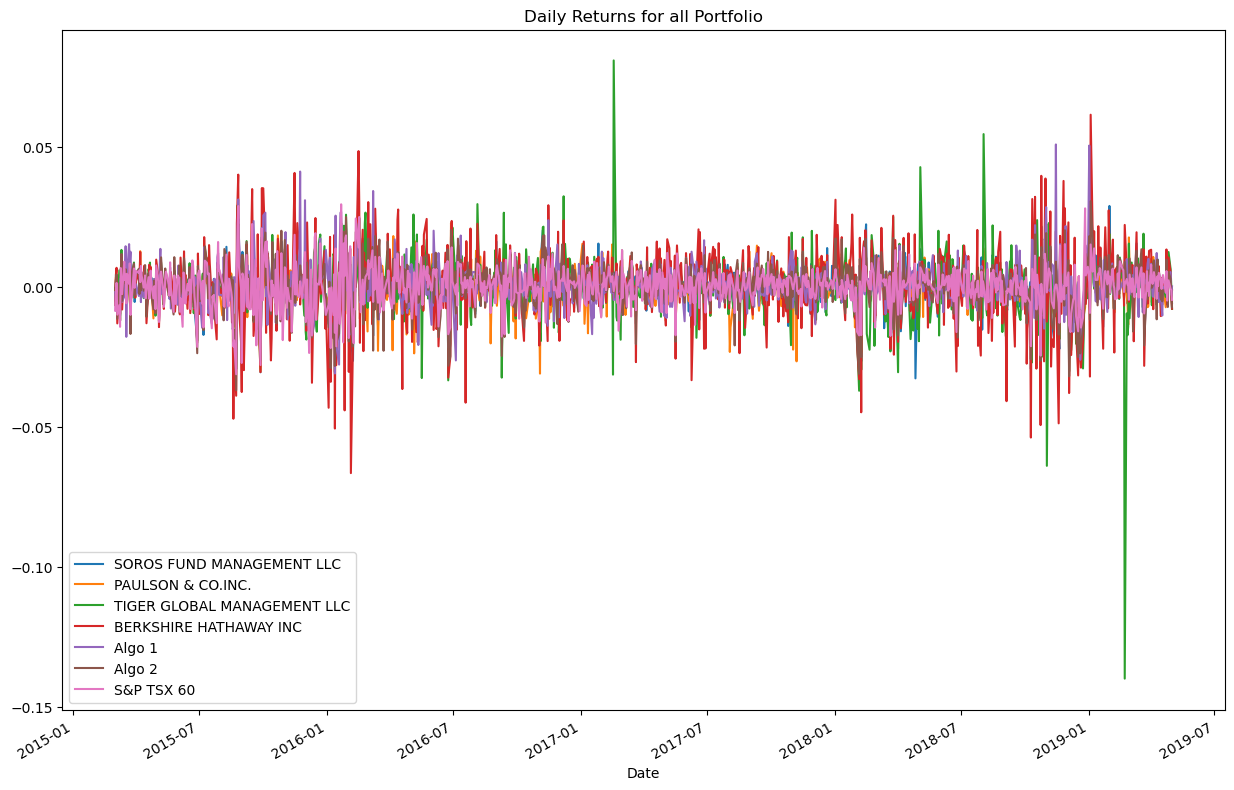

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10),title="Daily Returns for all Portfolio")


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

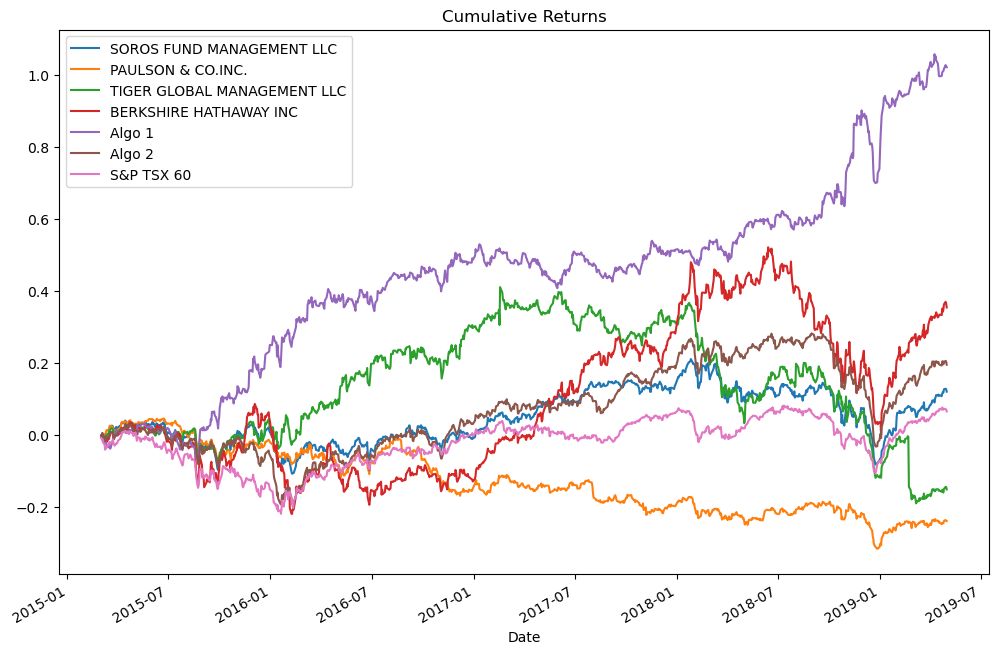

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12,8),title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

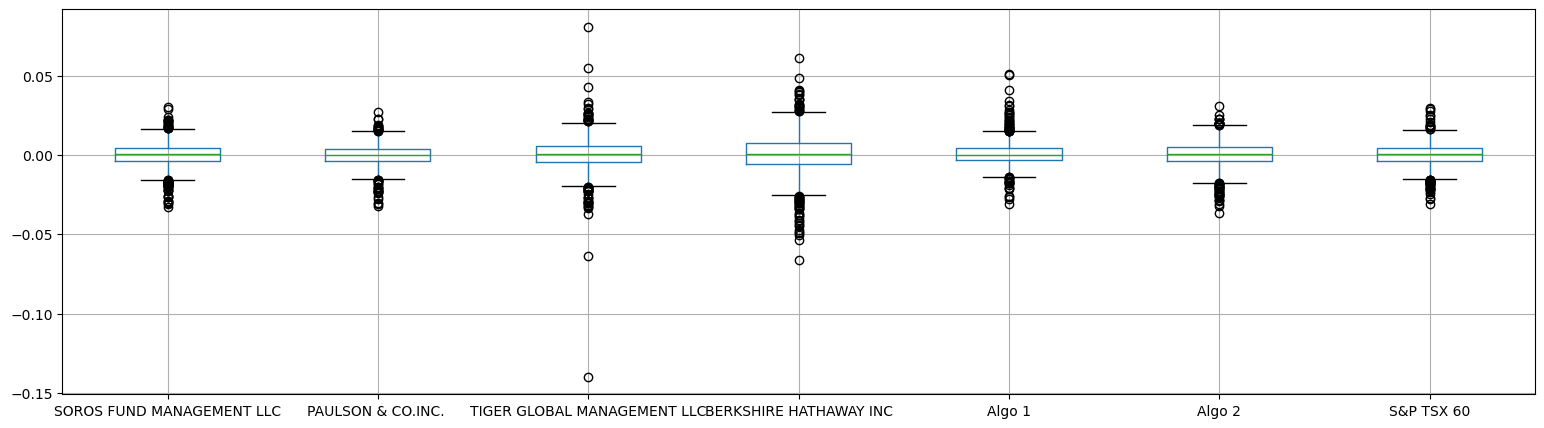

In [18]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(19,5))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = combined_df["S&P TSX 60"].std()
sp_std

# Determine which portfolios are riskier than the S&P TSX 60
combined_std.sort_values()

PAULSON & CO.INC.              0.006982
S&P TSX 60                     0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Date'>

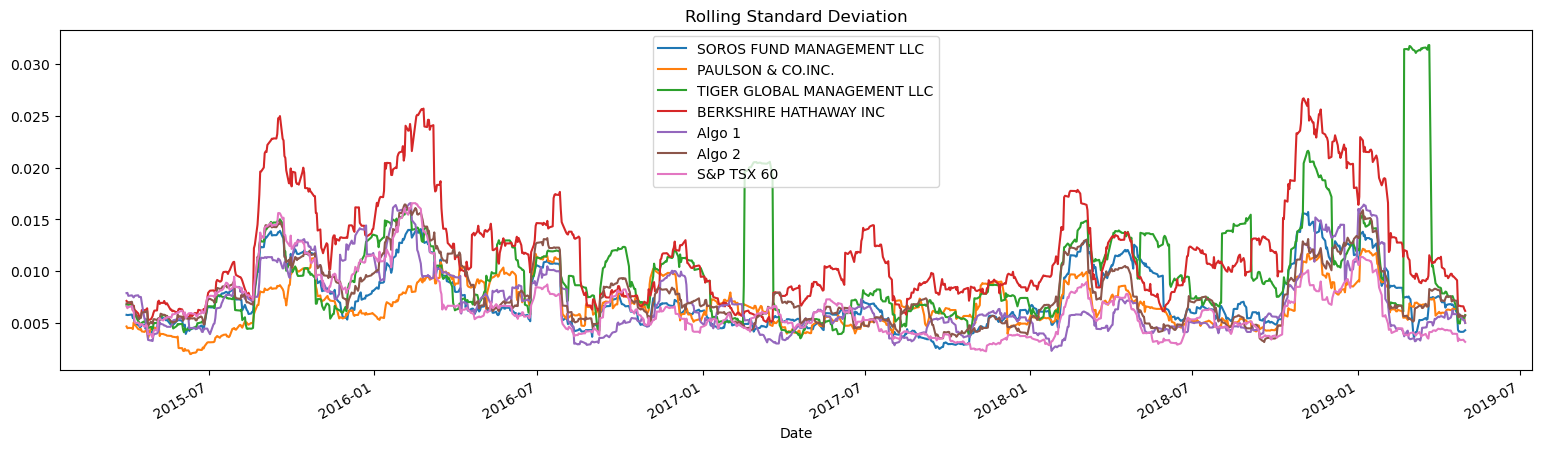

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
rolling_std

# Plot the rolling standard deviation
rolling_std.plot(figsize=(19,5),title = "Rolling Standard Deviation")

In [23]:
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


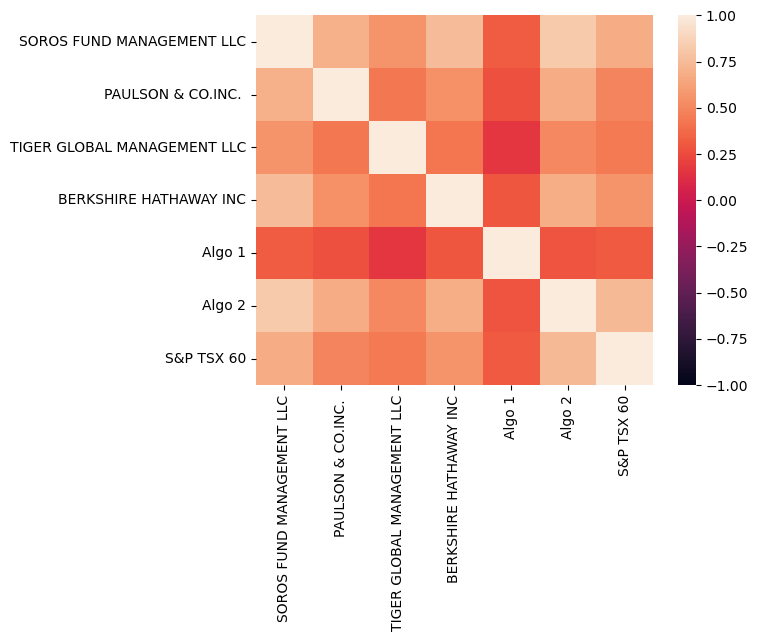

In [24]:
# Calculate the correlation
correlation_df = combined_df.corr()

# Display de correlation matrix
sns.heatmap(correlation_df, vmin = -1, vmax = 1)
correlation_df

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [25]:
sp_tsx_history_df['S&P TSX 60']

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: S&P TSX 60, Length: 1817, dtype: float64

In [26]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P TSX 60'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64

In [27]:
# Calculate variance of S&P TSX
rolling_variance = combined_df["S&P TSX 60"].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1029, dtype: float64

In [28]:
# Computing beta
rolling_beta = rolling_covariance/rolling_variance


<Axes: title={'center': 'Beta Trend'}, xlabel='Date'>

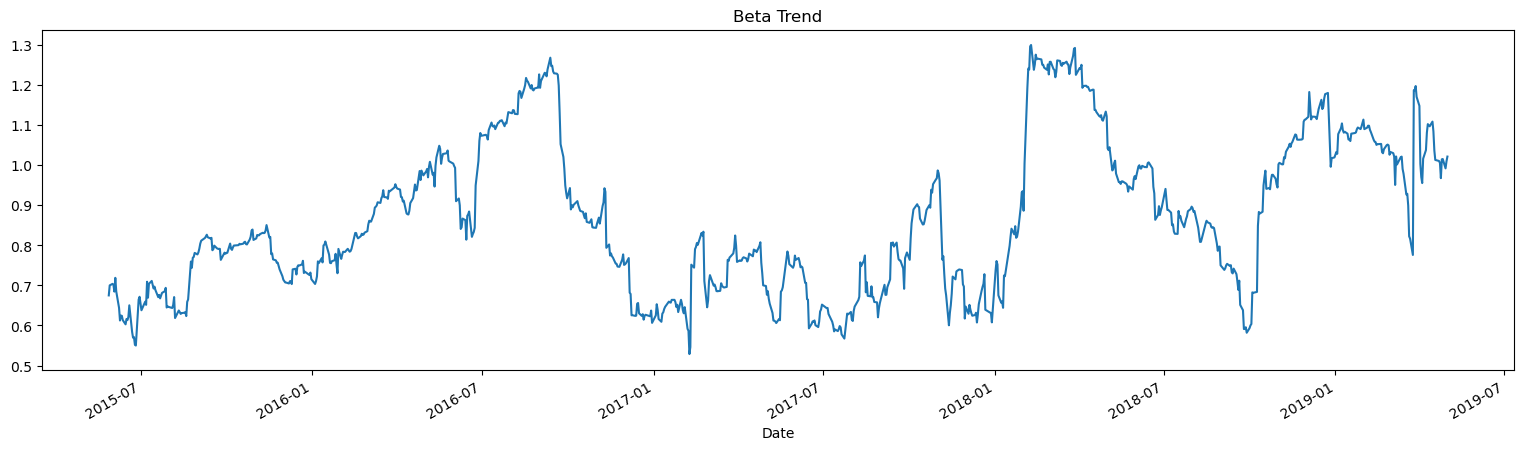

In [29]:
# Plot beta trend
rolling_beta.plot(figsize=(19,5),title="Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21)

In [31]:
ewm.std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<Axes: >

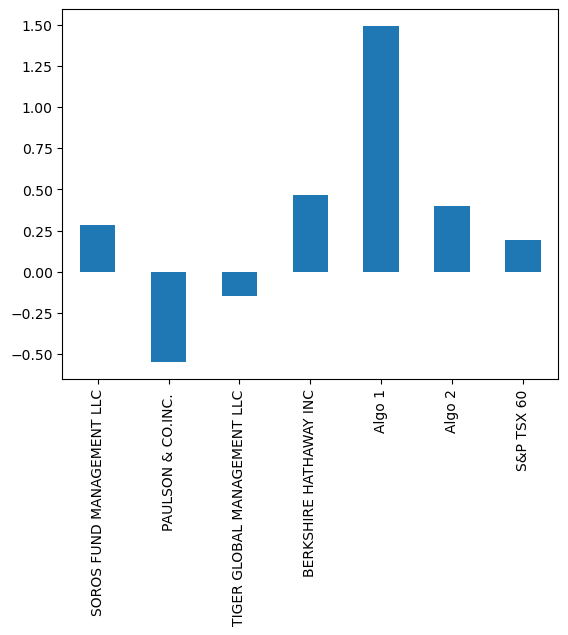

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperforms from the market (s&p TSX 60) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock
l_historical_csv = "/users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/l_historical.csv"
l_historical_df = pd.read_csv(l_historical_csv, index_col="Date", parse_dates=True)
l_historical_df.head()
l_historical_df.columns
l_historical_df = l_historical_df.rename(columns={'Close':'L'})
l_historical_df = l_historical_df.drop(columns=["Symbol"])

l_historical_df

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [36]:
# Reading data from 2nd stock
otex_historical_csv = "/users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/otex_historical.csv"
otex_historical_df = pd.read_csv(otex_historical_csv, index_col="Date", parse_dates=True)
otex_historical_df.head()
otex_historical_df.columns
otex_historical_df = otex_historical_df.rename(columns={'Close':'OTEX'})
otex_historical_df = otex_historical_df.drop(columns=["Symbol"])

otex_historical_df

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [37]:
# Reading data from 3rd stock
shop_historical_csv = "/users/harsh/Fintech_Projects/Portfolio_Analysis/Resources/shop_historical.csv"
shop_historical_df = pd.read_csv(shop_historical_csv, index_col="Date", parse_dates=True)
shop_historical_df.head()
shop_historical_df.columns
shop_historical_df = shop_historical_df.rename(columns={'Close':'SHOP'})
shop_historical_df = shop_historical_df.drop(columns=["Symbol"])
shop_historical_df

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [38]:
# Combine all stocks in a single DataFrame

allstocks_df = pd.concat([l_historical_df,otex_historical_df,shop_historical_df],axis="columns", join="inner")
allstocks_df

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [39]:
# Reorganize portfolio data by having a column per symbol
# went up and reorganized the column name to "L", "SHOP" and "OTEX"

In [40]:
# Calculate daily returns
allstocks_df['L'] = allstocks_df['L'].pct_change()
allstocks_df

allstocks_df['OTEX'] = allstocks_df['OTEX'].pct_change()
allstocks_df

allstocks_df['SHOP'] = allstocks_df['SHOP'].pct_change()
allstocks_df

# Drop NAs
allstocks_df = allstocks_df.dropna()
allstocks_df

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [41]:
# Display sample data
allstocks_df.sample(5)

,L,OTEX,SHOP
Date,,,
2019-01-23,-0.007665,0.006028,0.001532
2018-10-29,0.005124,-0.008310,-0.033696
2019-01-10,0.006562,0.010624,-0.002037
2018-10-18,0.004603,-0.009480,-0.015764
2019-06-03,0.001009,-0.024004,-0.043029


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
allstocks_df['my_portfolio'] = allstocks_df['L']*1/3 + allstocks_df['OTEX']*1/3 + allstocks_df['SHOP']*1/3


# Display sample data
allstocks_df.sample(5)

C:\Users\harsh\AppData\Local\Temp\ipykernel_5692\2593795365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allstocks_df['my_portfolio'] = allstocks_df['L']*1/3 + allstocks_df['OTEX']*1/3 + allstocks_df['SHOP']*1/3


,L,OTEX,SHOP,my_portfolio
Date,,,,
2019-05-06,0.012264,-0.000555,0.006425,0.006045
2019-07-05,-0.001787,-0.008667,-0.008333,-0.006262
2018-03-27,-0.010691,-0.013923,-0.058860,-0.027825
2018-02-08,-0.016937,-0.015905,-0.035110,-0.022651
2018-12-05,0.013388,0.005733,0.002913,0.007345


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
final_df = pd.concat([combined_df,allstocks_df],axis="columns", join="inner")
final_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,L,OTEX,SHOP,my_portfolio
Date,,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254,-0.000999
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.007398,0.006224,-0.003240,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.003672,0.000773,0.012628,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.002918,-0.006181,0.013173,0.003303


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df = final_df.dropna()
final_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,L,OTEX,SHOP,my_portfolio
Date,,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254,-0.000999
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.007398,0.006224,-0.003240,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.003672,0.000773,0.012628,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.002918,-0.006181,0.013173,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
final_annual_std = final_df * np.sqrt(252)
final_annual_std


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,L,OTEX,SHOP,my_portfolio
Date,,,,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,-0.158772,-0.185773,0.371439,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.002765,-0.058972,0.271329,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,0.000000,-0.125783,-0.023097,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.154819,-0.152890,0.260219,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,0.142385,-0.011296,-0.178647,-0.015853
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973,0.117444,0.098810,-0.051428,0.054942
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779,-0.058291,0.012275,0.200467,0.051484
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508,0.046317,-0.098123,0.209113,0.052435


### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Final Rolling Standard Deviation'}, xlabel='Date'>

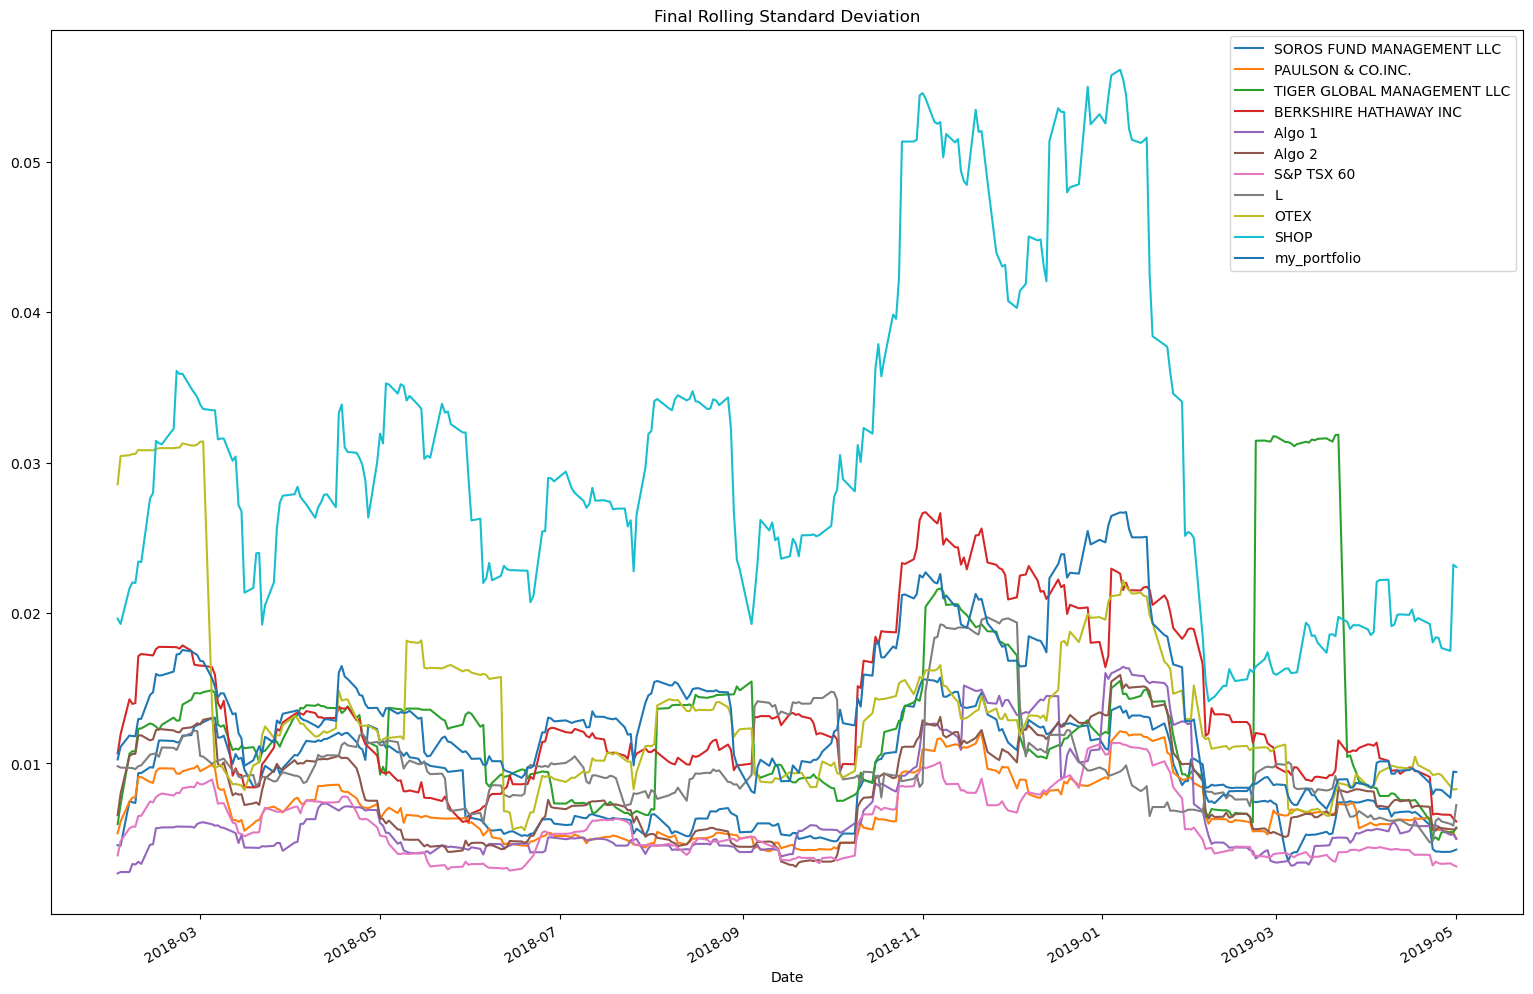

In [46]:
# Calculate rolling standard deviation
final_rolling_std = final_df.rolling(window=21).std()
final_rolling_std

# Plot rolling standard deviation
final_rolling_std.plot(figsize=(19,13),title = "Final Rolling Standard Deviation")

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,L,OTEX,SHOP,my_portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.192009,0.383971,0.508507,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.164145,0.320638,0.317837,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.339680,0.250926,0.183726,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.130815,0.413242,0.637107,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.099106,0.108323,0.206226,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.168862,0.426084,0.507364,0.563756
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.338382,0.450590,0.462264,0.579228
L,0.192009,0.164145,0.339680,0.130815,0.099106,0.168862,0.338382,1.000000,0.174320,0.113386,0.385428
OTEX,0.383971,0.320638,0.250926,0.413242,0.108323,0.426084,0.450590,0.174320,1.000000,0.395357,0.673651
SHOP,0.508507,0.317837,0.183726,0.637107,0.206226,0.507364,0.462264,0.113386,0.395357,1.000000,0.908990


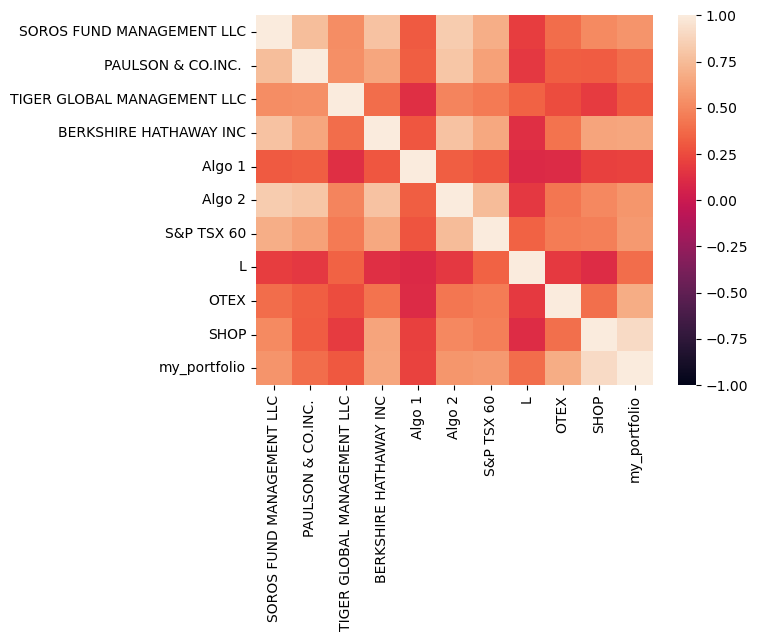

In [47]:
# Calculate and plot the correlation
final_correlation_df = final_df.corr()
final_correlation_df

# Display de correlation matrix
sns.heatmap(final_correlation_df, vmin = -1, vmax = 1)
final_correlation_df

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [48]:
# Calculate covariance of a single portfolio
rolling_covariance = final_df['my_portfolio'].rolling(window=60).cov(final_df['S&P TSX 60'])
rolling_covariance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000013
2019-04-26    0.000013
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000012
Length: 328, dtype: float64

In [49]:
rolling_variance = final_df["S&P TSX 60"].rolling(window=60).var()

<Axes: title={'center': 'Beta Trend'}, xlabel='Date'>

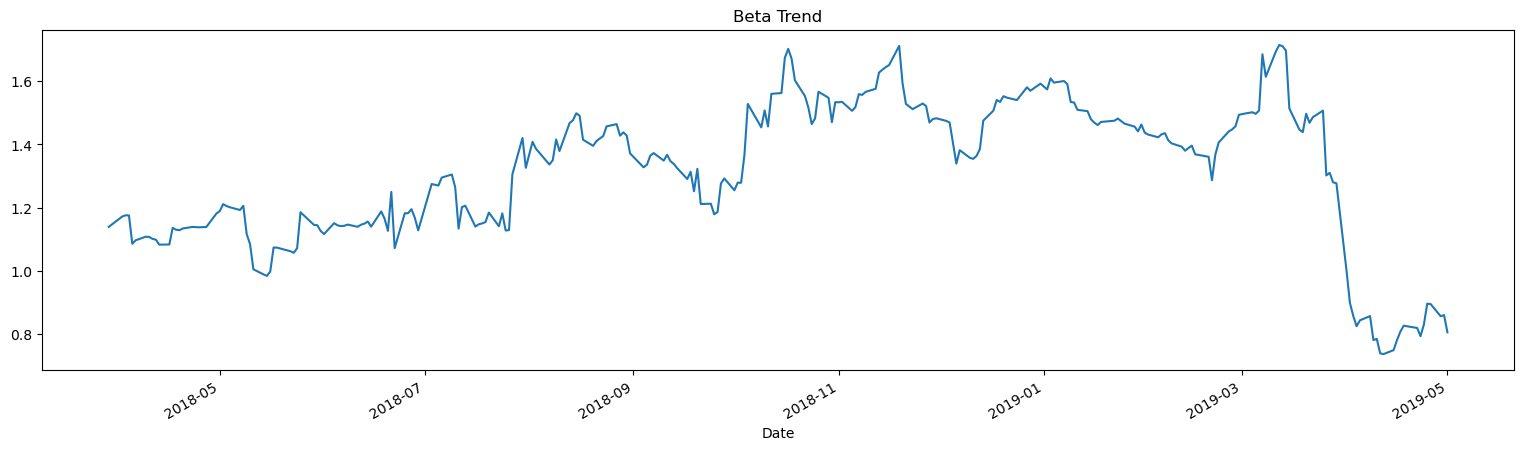

In [50]:
# Calculate and plot Beta
final_rolling_beta = rolling_covariance/rolling_variance

final_rolling_beta.plot(figsize=(19,5),title="Beta Trend")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((final_df.mean()) * 252) / (final_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
L                              0.532599
OTEX                           0.762776
SHOP                           1.575294
my_portfolio                   1.564547
dtype: float64

<Axes: >

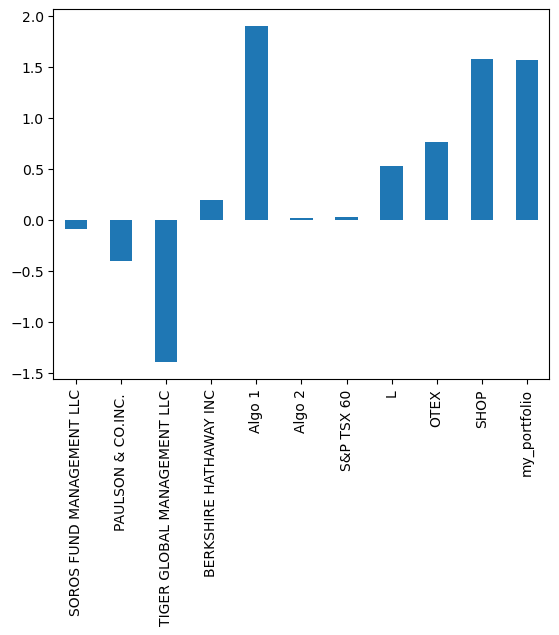

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

My portfolio is better than other stocks but low performance than Algo 1.